In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Student_Performance_Dataset.csv',index_col='Student_ID')

In [3]:
df.head()

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
Student_ID,,,,,,,,,,,,,,,
S0001,15,Male,12,1.0,65,Postgraduate,No,No,40,39,72,81,50.33,Average,Pass
S0002,19,Female,9,1.6,58,Graduate,No,Yes,80,44,35,47,53.00,Average,Pass
S0003,14,Female,12,3.6,64,High School,Yes,Yes,83,73,59,58,71.67,Good,Pass
S0004,18,Female,9,5.5,68,Postgraduate,Yes,No,68,48,77,54,64.33,Average,Pass
S0005,14,Male,10,5.0,80,High School,Yes,No,41,46,36,68,41.00,Poor,Fail


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, S0001 to S5000
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         5000 non-null   int64  
 1   Gender                      5000 non-null   object 
 2   Class                       5000 non-null   int64  
 3   Study_Hours_Per_Day         5000 non-null   float64
 4   Attendance_Percentage       5000 non-null   int64  
 5   Parental_Education          5000 non-null   object 
 6   Internet_Access             5000 non-null   object 
 7   Extracurricular_Activities  5000 non-null   object 
 8   Math_Score                  5000 non-null   int64  
 9   Science_Score               5000 non-null   int64  
 10  English_Score               5000 non-null   int64  
 11  Previous_Year_Score         5000 non-null   int64  
 12  Final_Percentage            5000 non-null   float64
 13  Performance_Level           5000 

In [5]:
df.shape

(5000, 15)

In [6]:
# Sort the dataframe by Final_Percentage in descending order and get the top 10 rows
final_score = df.sort_values(by=['Final_Percentage'], ascending=False).head(10)

# Create a new dataframe with only the selected columns from the top 10 students
top_10_by_final_percentage = final_score[['Final_Percentage', 'Class', 'Age', 'Internet_Access', 
                                         'Math_Score', 'Previous_Year_Score', 'Performance_Level']]

# Display the top 10 students by final percentage
top_10_by_final_percentage

,Final_Percentage,Class,Age,Internet_Access,Math_Score,Previous_Year_Score,Performance_Level
Student_ID,,,,,,,
S0022,98.33,12,15,No,100,86,Excellent
S3637,97.67,9,15,No,99,73,Excellent
S3749,97.33,11,17,No,99,58,Excellent
S2212,97.33,11,19,No,98,54,Excellent
S1600,97.00,9,14,Yes,100,71,Excellent
S4245,97.00,12,17,Yes,95,42,Excellent
S2197,96.33,11,14,Yes,97,66,Excellent
S4505,96.00,11,14,Yes,100,83,Excellent
S1969,96.00,12,17,Yes,97,95,Excellent


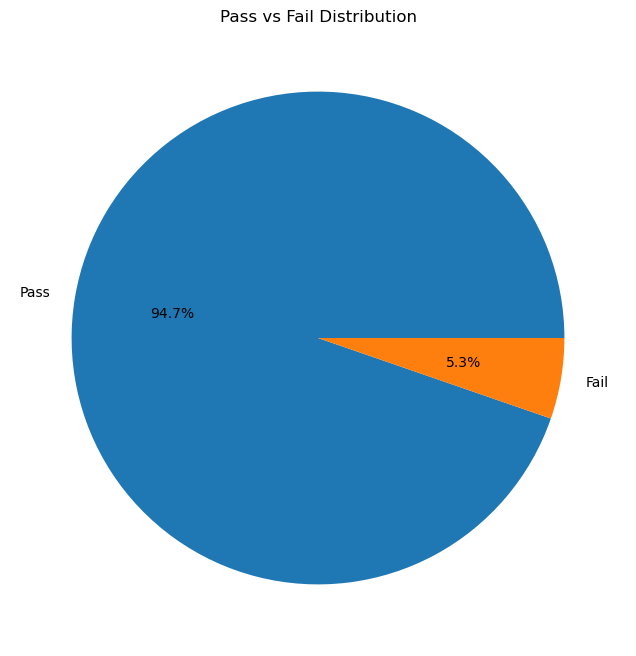

In [32]:
# Count the number of passes and fails in the dataset
pass_fail = df['Pass_Fail'].value_counts()

# Create a pie chart visualization of the pass/fail distribution
# - figsize sets the chart dimensions to 12x8 inches
# - autopct adds percentage labels to each slice with 1 decimal place
pass_fail.plot(kind='pie', figsize=(10,8), autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Pass vs Fail Distribution')

# Remove the y-axis label as it's not needed for a pie chart
plt.ylabel('')

# Display the pie chart
plt.savefig('Pass and Fail.png',
           dpi=180,
           bbox_inches='tight')
plt.show()

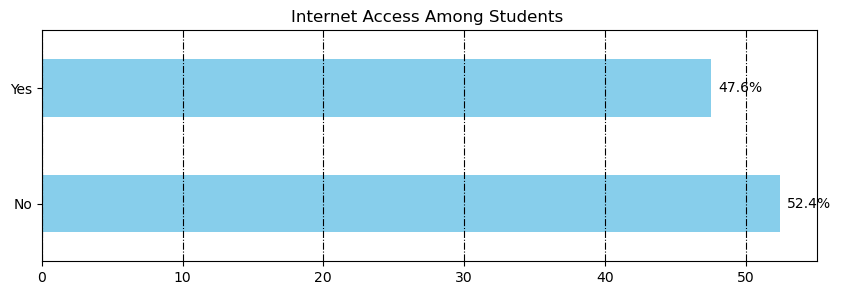

In [31]:
# Count the number of students with different internet access types
having_internet_access = df['Internet_Access'].value_counts()

# Calculate the percentage of each internet access type
internet_percent = (having_internet_access/having_internet_access.sum()) *100

# Create a horizontal bar chart showing internet access distribution
internet_percent.plot(kind='barh',figsize=(10,3),color='skyblue')

# Add percentage labels to each bar
for index, value in enumerate(internet_percent):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center') 

# Add vertical grid lines to improve readability
plt.grid(axis='x',linestyle='-.',color='0')

# Set chart title and remove y-axis label (as it's already shown by the bars)
plt.title('Internet Access Among Students ')
plt.ylabel('')

# Display the chart
plt.savefig('Internet Access Among.png',
           dpi=150,
           bbox_inches='tight')
plt.show()

In [9]:
# Retrieve information for student with ID 'S0022' from the dataframe
# Using .loc to access a specific row by its label/index
The_top_student_information = df.loc['S0022']
# Display the retrieved student information
The_top_student_information

Age                                     15
Gender                                Male
Class                                   12
Study_Hours_Per_Day                    2.8
Attendance_Percentage                   83
Parental_Education            Postgraduate
Internet_Access                         No
Extracurricular_Activities             Yes
Math_Score                             100
Science_Score                           96
English_Score                           99
Previous_Year_Score                     86
Final_Percentage                     98.33
Performance_Level                Excellent
Pass_Fail                             Pass
Name: S0022, dtype: object

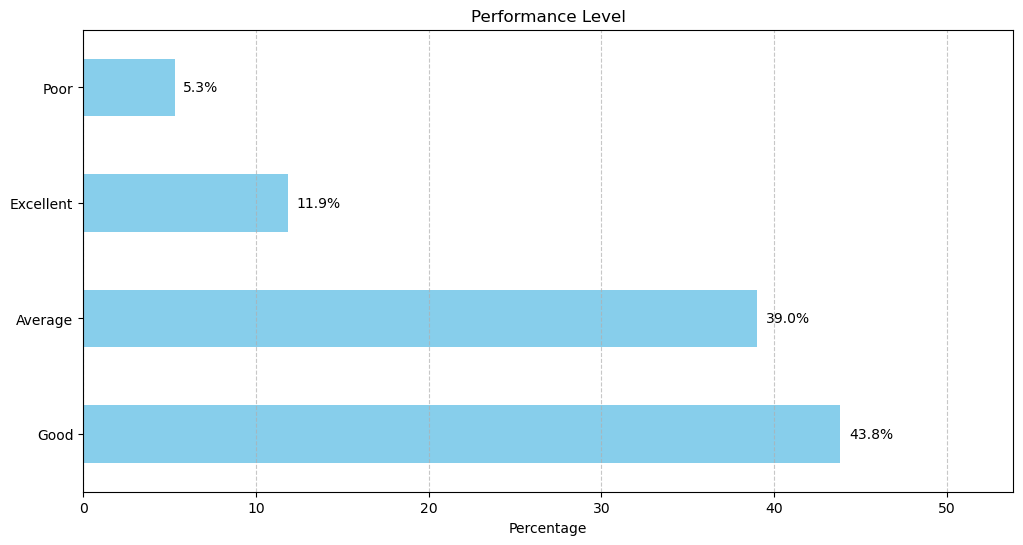

In [33]:
# Count the occurrences of each performance level
performance = df['Performance_Level'].value_counts()

# Calculate the percentage distribution of performance levels
performance_percent = (performance / performance.sum()) * 100

# Create a horizontal bar chart with the performance percentages
performance_percent.plot(kind='barh', figsize=(12,6), color='skyblue')

# Add percentage labels to the end of each bar
for index, value in enumerate(performance_percent):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center')  

# Add a grid on the x-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Set the chart title and axis labels
plt.title('Performance Level')
plt.xlabel('Percentage')
plt.ylabel('')  # No label for y-axis as it shows performance levels

# Set the x-axis limit to provide some space after the longest bar
plt.xlim(0, max(performance_percent) + 10)  

plt.savefig('Performance Lavel.png',
           dpi=150,
           bbox_inches='tight')

# Display the chart
plt.show()

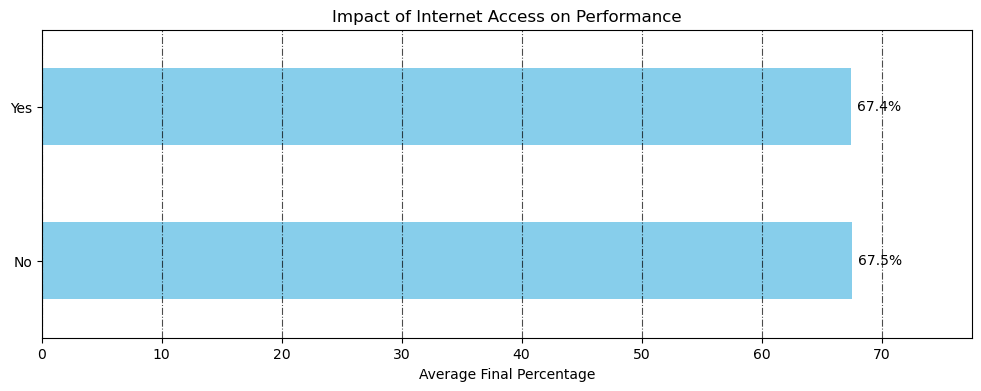

In [34]:
# Calculate the mean final percentage for each internet access category
internet_impact = df.groupby('Internet_Access')['Final_Percentage'].mean()

# Create a horizontal bar plot to visualize the impact
internet_impact.plot(kind='barh', figsize=(12,4), color='skyblue')

# Add text labels showing the percentage values on each bar
for index, value in enumerate(internet_impact):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center')  

# Add a grid on the x-axis for better readability
plt.grid(axis='x',linestyle='-.',alpha=0.7,color='0',)

# Set the x-axis label and chart title
plt.xlabel('Average Final Percentage')
plt.title('Impact of Internet Access on Performance')

# Set the x-axis limit to ensure text labels are visible
plt.xlim(0, max(internet_impact) + 10)

# Remove y-axis label as category names are already shown
plt.ylabel('')

plt.savefig('Impact of Internet Access on Performance.png',
           dpi=150,
           bbox_inches='tight')


# Display the plot
plt.show()

In [35]:
# Filter students who failed
# This creates a new DataFrame containing only students who didn't pass the course
failed_students = df[df['Pass_Fail'] == 'Fail']

# Get the top 10 students with the lowest performance
# First sort the failed students by their final percentage in ascending order (lowest first)
lowest_percentages = failed_students.sort_values(by=['Final_Percentage'])
# Display the first 10 rows of the sorted DataFrame, showing the students with the lowest scores
lowest_percentages.head(10)

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
Student_ID,,,,,,,,,,,,,,,
S2719,16,Male,11,5.1,50,Postgraduate,Yes,No,36,36,37,60,36.33,Poor,Fail
S2158,16,Female,9,5.2,70,Postgraduate,No,Yes,35,35,43,69,37.67,Poor,Fail
S3191,15,Male,9,5.0,91,Graduate,No,Yes,40,37,36,41,37.67,Poor,Fail
S1687,15,Female,11,5.4,82,Graduate,Yes,No,35,42,36,44,37.67,Poor,Fail
S1685,14,Female,10,1.0,88,Graduate,No,Yes,39,36,40,46,38.33,Poor,Fail
S3091,19,Male,9,5.1,82,Graduate,No,No,44,36,35,91,38.33,Poor,Fail
S3410,14,Male,12,1.4,82,Graduate,Yes,Yes,36,41,39,70,38.67,Poor,Fail
S2573,19,Male,12,2.0,86,Postgraduate,Yes,Yes,37,43,36,76,38.67,Poor,Fail
S1279,14,Female,10,1.5,79,Postgraduate,Yes,No,37,36,44,78,39.00,Poor,Fail


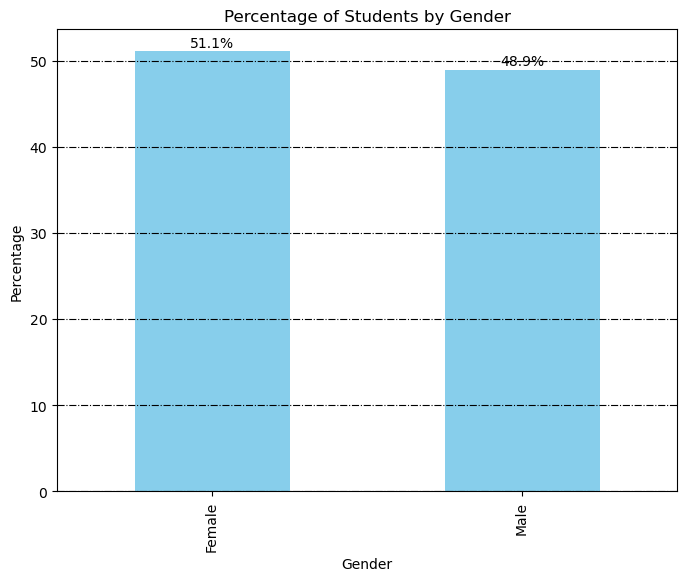

In [36]:
# Calculate gender counts and percentages
gender_student = df['Gender'].value_counts()  # Count occurrences of each gender
gender_student_percentage = (gender_student / gender_student.sum()) * 100  # Convert counts to percentages

# Plot vertical bar chart
gender_student_percentage.plot(kind='bar', figsize=(8,6), color='skyblue')  # Create bar chart with specified size and color

# Add percentage labels above bars
for index, value in enumerate(gender_student_percentage):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center')  # Place text labels with 1 decimal place above each bar

plt.grid(axis='y',linestyle='-.',color='k')  # Add horizontal grid lines with dash-dot style in black

plt.title('Percentage of Students by Gender')  # Set chart title
plt.xlabel('Gender')  # Set x-axis label
plt.ylabel('Percentage')  # Set y-axis label

plt.savefig('Percentage of Students by Gender.png',
           dpi=150,
           bbox_inches='tight')

plt.show()  # Display the chart

In [14]:
# Filter the dataframe to get only male students
male = df[df['Gender']=='Male']
# Sort the filtered dataframe by Final_Percentage in descending order
top_10_male_performar=male.sort_values(by=['Final_Percentage'],ascending=False)
# Display the top 10 male performers based on Final_Percentage
top_10_male_performar.head(10)

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
Student_ID,,,,,,,,,,,,,,,
S0022,15,Male,12,2.8,83,Postgraduate,No,Yes,100,96,99,86,98.33,Excellent,Pass
S2212,19,Male,11,1.8,87,Graduate,No,Yes,98,98,96,54,97.33,Excellent,Pass
S3749,17,Male,11,0.5,60,Graduate,No,Yes,99,93,100,58,97.33,Excellent,Pass
S1600,14,Male,9,5.0,83,High School,Yes,No,100,99,92,71,97.00,Excellent,Pass
S1969,17,Male,12,5.4,54,High School,Yes,Yes,97,95,96,95,96.00,Excellent,Pass
S0861,14,Male,10,2.1,91,Postgraduate,No,Yes,100,93,94,64,95.67,Excellent,Pass
S1483,14,Male,12,1.3,55,Graduate,Yes,Yes,91,95,99,55,95.00,Excellent,Pass
S4021,14,Male,12,5.0,61,Graduate,Yes,Yes,98,97,89,70,94.67,Excellent,Pass
S4167,19,Male,9,4.1,91,Postgraduate,No,Yes,96,87,99,94,94.00,Excellent,Pass


In [15]:
# Filter the dataframe to get only female students
female = df[df['Gender']=='Female']

# Sort the filtered dataframe by Final_Percentage in descending order
top_10_famale_performar=female.sort_values(by=['Final_Percentage'],ascending=False)

# Display the top 10 female performers based on Final_Percentage
top_10_famale_performar.head(10)

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
Student_ID,,,,,,,,,,,,,,,
S3637,15,Female,9,3.8,90,High School,No,Yes,99,95,99,73,97.67,Excellent,Pass
S4245,17,Female,12,1.3,57,Postgraduate,Yes,Yes,95,96,100,42,97.00,Excellent,Pass
S2197,14,Female,11,1.7,72,High School,Yes,No,97,99,93,66,96.33,Excellent,Pass
S4505,14,Female,11,1.1,59,Graduate,Yes,No,100,99,89,83,96.00,Excellent,Pass
S3270,17,Female,9,5.2,88,Postgraduate,Yes,Yes,96,100,92,69,96.00,Excellent,Pass
S4809,17,Female,10,5.6,55,High School,No,Yes,90,100,96,51,95.33,Excellent,Pass
S4455,19,Female,11,1.5,56,Graduate,No,Yes,99,95,92,42,95.33,Excellent,Pass
S0659,18,Female,12,5.9,69,Graduate,No,Yes,95,99,90,41,94.67,Excellent,Pass
S2680,16,Female,9,2.5,61,Graduate,Yes,Yes,87,96,100,54,94.33,Excellent,Pass


##### The average performance of male and female students is almost identical.The difference in final percentage is negligible, indicating that gender does not have a significant impact on student performance in this dataset.

In [16]:
# Group the dataframe by 'Gender' column and calculate the mean of 'Final_Percentage' for each gender
avg_performance = df.groupby('Gender')['Final_Percentage'].mean()
# Display the average performance percentage for each gender
print(avg_performance)

Gender
Female    67.419890
Male      67.537924
Name: Final_Percentage, dtype: float64


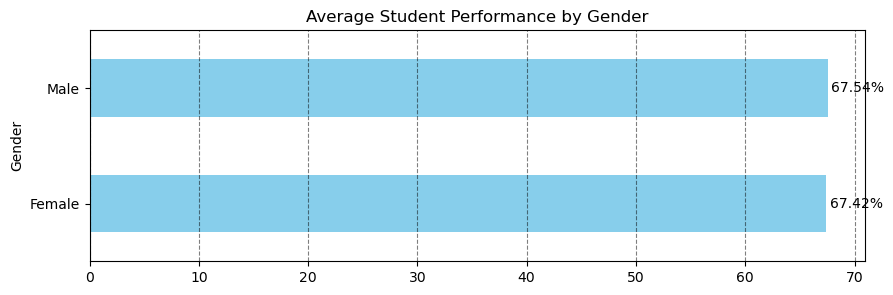

In [37]:
# Plot average performance by gender using horizontal bar chart
avg_performance.plot(kind='barh', figsize=(10,3), color='skyblue')

# Add text labels showing the exact percentage values next to each bar
for index, value in enumerate(avg_performance):
    plt.text(value + 0.3, index, f'{value:.2f}%', va='center')

# Add subtle horizontal grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5, color='0')

# Set the chart title
plt.title('Average Student Performance by Gender')

plt.savefig('Average Student Performance by Gender.png',
           dpi=150,
           bbox_inches='tight')

# Display the plot
plt.show()


In [18]:
# Sort the dataframe by 'Study_Hours_Per_Day' column in descending order (highest to lowest)
# Then select the top 10 rows with the highest study hours
highest_study_hours = df.sort_values(by=['Study_Hours_Per_Day'], ascending=False).head(10)
highest_study_hours  # Display the resulting dataframe with the 10 students who study the most


,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
Student_ID,,,,,,,,,,,,,,,
S0476,15,Female,10,6.0,86,Graduate,No,Yes,46,51,70,76,55.67,Average,Pass
S1093,19,Female,12,6.0,52,Graduate,No,No,44,81,92,67,72.33,Good,Pass
S0972,16,Female,10,6.0,86,Postgraduate,Yes,No,40,91,100,91,77.00,Good,Pass
S1037,18,Female,9,6.0,68,Graduate,Yes,Yes,40,42,39,86,40.33,Poor,Fail
S0498,17,Male,11,6.0,91,High School,No,No,46,91,71,46,69.33,Good,Pass
S4658,15,Male,12,6.0,57,Graduate,Yes,No,83,63,96,63,80.67,Good,Pass
S1055,14,Male,11,6.0,51,Postgraduate,No,No,52,44,47,56,47.67,Poor,Fail
S1825,16,Male,12,6.0,89,Postgraduate,Yes,No,36,53,51,67,46.67,Poor,Fail
S1808,18,Male,11,6.0,86,Graduate,No,Yes,57,86,52,81,65.00,Average,Pass


In [19]:
# Sort the dataframe by 'Study_Hours_Per_Day' column in ascending order (lowest first)
# Then select the top 10 rows with the lowest study hours
lowest_study_hours = df.sort_values(by=['Study_Hours_Per_Day'], ascending=True).head(10)
lowest_study_hours  # Display the resulting dataframe with the 10 students who study the least

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
Student_ID,,,,,,,,,,,,,,,
S1356,18,Female,12,0.5,78,Postgraduate,No,Yes,71,67,97,85,78.33,Good,Pass
S3537,16,Male,9,0.5,66,High School,Yes,No,59,77,42,41,59.33,Average,Pass
S2477,15,Male,12,0.5,50,Postgraduate,Yes,Yes,75,52,35,40,54.00,Average,Pass
S2482,19,Female,10,0.5,77,High School,Yes,Yes,92,79,44,51,71.67,Good,Pass
S4909,17,Female,9,0.5,97,Postgraduate,No,Yes,43,81,86,66,70.00,Good,Pass
S0097,19,Female,11,0.5,75,Postgraduate,No,No,50,98,68,88,72.00,Good,Pass
S3676,14,Female,11,0.5,69,Graduate,No,No,46,82,70,71,66.00,Good,Pass
S2450,16,Male,11,0.5,62,High School,Yes,Yes,79,43,62,76,61.33,Average,Pass
S2622,17,Female,11,0.5,88,Postgraduate,Yes,Yes,59,98,42,47,66.33,Good,Pass


In [20]:
# Get the frequency count of study hours per day from the dataframe
# The value_counts() method counts occurrences of each unique value
# ascending=False ensures the most frequent values appear first
hours_of_study = df['Study_Hours_Per_Day'].value_counts(ascending=False)
# Display the top 10 most common study hour values
hours_of_study.head(10)

Study_Hours_Per_Day
1.9    108
3.2    108
5.4    106
2.9    106
5.8    104
5.5    104
5.7    103
4.4    103
5.6    101
2.0    101
Name: count, dtype: int64

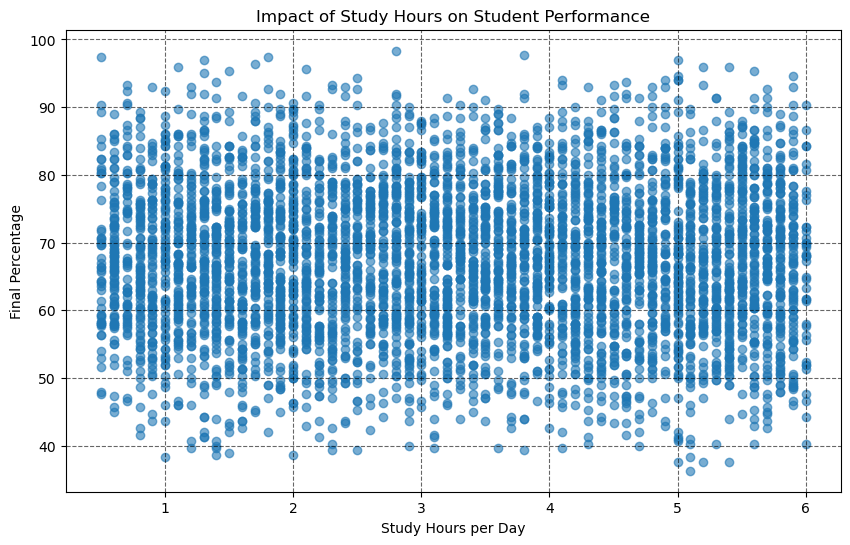

In [38]:
# Create a scatter plot with a figure size of 10x6 inches
plt.figure(figsize=(10,6))
# Plot study hours vs final percentage with partial transparency (alpha=0.6)
plt.scatter(df['Study_Hours_Per_Day'], df['Final_Percentage'], alpha=0.6)

# Add x-axis label
plt.xlabel('Study Hours per Day')
# Add y-axis label
plt.ylabel('Final Percentage')
# Add title to the plot
plt.title('Impact of Study Hours on Student Performance')

# Add grid lines with dashed style, partial transparency, and black color
plt.grid(True, linestyle='--', alpha=0.6, color='0')

plt.savefig('Impact of Study Hours on Student Performance.png',
           dpi=150,
           bbox_inches='tight')
# Display the plot
plt.show()

In [22]:
df

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
Student_ID,,,,,,,,,,,,,,,
S0001,15,Male,12,1.0,65,Postgraduate,No,No,40,39,72,81,50.33,Average,Pass
S0002,19,Female,9,1.6,58,Graduate,No,Yes,80,44,35,47,53.00,Average,Pass
S0003,14,Female,12,3.6,64,High School,Yes,Yes,83,73,59,58,71.67,Good,Pass
S0004,18,Female,9,5.5,68,Postgraduate,Yes,No,68,48,77,54,64.33,Average,Pass
S0005,14,Male,10,5.0,80,High School,Yes,No,41,46,36,68,41.00,Poor,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S4996,17,Male,11,4.0,50,Graduate,No,No,64,60,70,93,64.67,Average,Pass
S4997,19,Male,10,5.6,90,High School,Yes,No,44,59,43,63,48.67,Poor,Fail
S4998,16,Female,9,2.3,61,Graduate,No,No,95,41,82,62,72.67,Good,Pass


In [23]:
# I want to see the impact Extracurricular_Activities on students performancess ??
avg_scores = df.groupby('Extracurricular_Activities')[['Final_Percentage','Math_Score','Science_Score','English_Score']].mean()

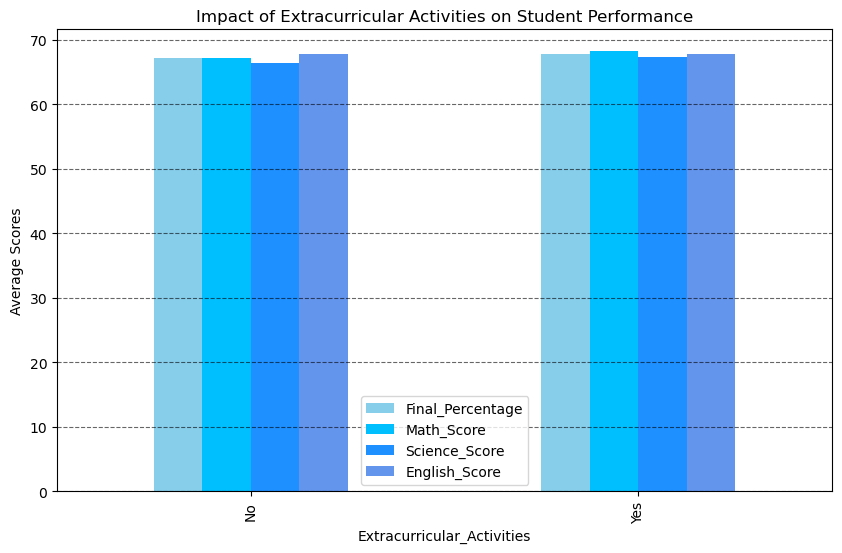

In [39]:
# Define a list of blue-themed colors for the bar chart
colors = ['skyblue', 'deepskyblue', 'dodgerblue', 'cornflowerblue']

# Create a bar chart from the avg_scores DataFrame with specified size and colors
avg_scores.plot(kind='bar', figsize=(10,6), color=colors)

# Add horizontal grid lines with dashed style, slight transparency, and black color
plt.grid(axis='y', linestyle='--', alpha=0.6, color='0')
# Set the title of the chart
plt.title('Impact of Extracurricular Activities on Student Performance')
# Label the y-axis
plt.ylabel('Average Scores')

plt.savefig('Impact of Extracurricular Activities on Student Performance.png',
           dpi=150,
           bbox_inches='tight')

# Display the chart
plt.show()


In [40]:
# Display the DataFrame 'df' to view its contents
df

,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
Student_ID,,,,,,,,,,,,,,,
S0001,15,Male,12,1.0,65,Postgraduate,No,No,40,39,72,81,50.33,Average,Pass
S0002,19,Female,9,1.6,58,Graduate,No,Yes,80,44,35,47,53.00,Average,Pass
S0003,14,Female,12,3.6,64,High School,Yes,Yes,83,73,59,58,71.67,Good,Pass
S0004,18,Female,9,5.5,68,Postgraduate,Yes,No,68,48,77,54,64.33,Average,Pass
S0005,14,Male,10,5.0,80,High School,Yes,No,41,46,36,68,41.00,Poor,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S4996,17,Male,11,4.0,50,Graduate,No,No,64,60,70,93,64.67,Average,Pass
S4997,19,Male,10,5.6,90,High School,Yes,No,44,59,43,63,48.67,Poor,Fail
S4998,16,Female,9,2.3,61,Graduate,No,No,95,41,82,62,72.67,Good,Pass
